# *Muhammad Tahir Zia (2021465)*

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## *Dataset with multiple features*

In [2]:
# Here we create a synthetic dataset for demonstration
np.random.seed(42)
n_samples = 100
n_features = 3

# Generate random data (3 features: X1, X2, X3)
X1 = np.random.randn(n_samples)
X2 = 2 * X1 + np.random.randn(n_samples)  # Correlated with X1
X3 = 3 * X1 + np.random.randn(n_samples)  # Correlated with X1 and X2

In [3]:
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})
print("Dataset:")
print(data.head())

Dataset:
         X1        X2        X3
0  0.496714 -0.421942  1.847930
1 -0.138264 -0.697174  0.145992
2  0.647689  0.952663  3.026117
3  1.523030  2.243782  5.622892
4 -0.234153 -0.629592 -2.080129


## *Covariance Matrix of the Dataset*

In [4]:
cov_matrix = data.cov()
print("\nCovariance Matrix:")
print(cov_matrix)


Covariance Matrix:
          X1        X2        X3
X1  0.824770  1.531386  2.662232
X2  1.531386  3.735947  4.932122
X3  2.662232  4.932122  9.726132


## *Eigen Values and Eigen Vectors*

In [5]:
# Step 3: Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[13.2598302   0.06539548  0.96162345]

Eigenvectors:
[[ 0.23976966  0.97035093 -0.03048914]
 [ 0.47657102 -0.14500348 -0.86709518]
 [ 0.84580765 -0.19337287  0.49720857]]


## *Linear Regression Model*

In [6]:
# Step 4: Linear regression to predict one feature (e.g., X3) using X1 and X2
X = data[['X1', 'X2']]
y = data['X3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Linear Regression Model Performance:
Mean Squared Error (MSE): 0.5449
R-squared (R2): 0.9334


## *Analysis of Eigen values and Model*

In [7]:
# Step 5: Analyze relationship between eigenvalues and model performance
# Explanation:
# Large eigenvalues correspond to high variance directions in the data.
# These directions likely contribute more to predicting the dependent variable.

total_variance = sum(eigenvalues)
explained_variance_ratio = [ev / total_variance for ev in eigenvalues]

print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

print("\nAnalysis:")
print(f"The R-squared score of {r2:.4f} indicates the model's ability to explain variance in the target variable.")
print("Eigenvalues represent the variance captured by each principal component. Larger eigenvalues may suggest")
print("the importance of that component for predicting the target variable.")


Explained Variance Ratio:
Principal Component 1: 0.9281
Principal Component 2: 0.0046
Principal Component 3: 0.0673

Analysis:
The R-squared score of 0.9334 indicates the model's ability to explain variance in the target variable.
Eigenvalues represent the variance captured by each principal component. Larger eigenvalues may suggest
the importance of that component for predicting the target variable.


## *Visualization of Actual vs Predicted*

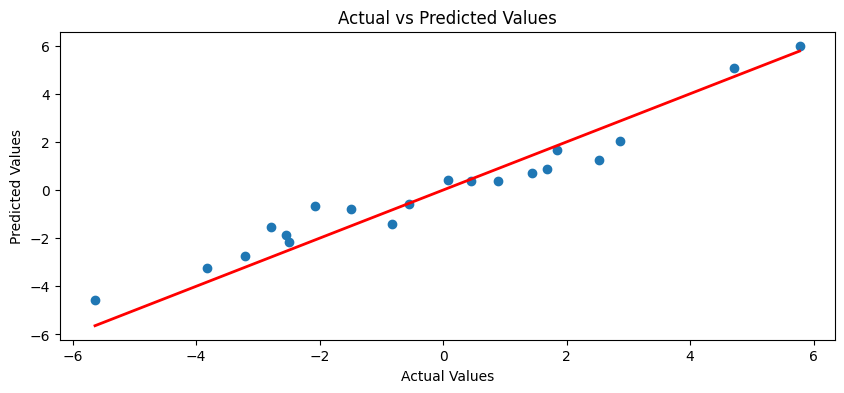

In [9]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
